Saving country_wise_latest.csv to country_wise_latest (2).csv


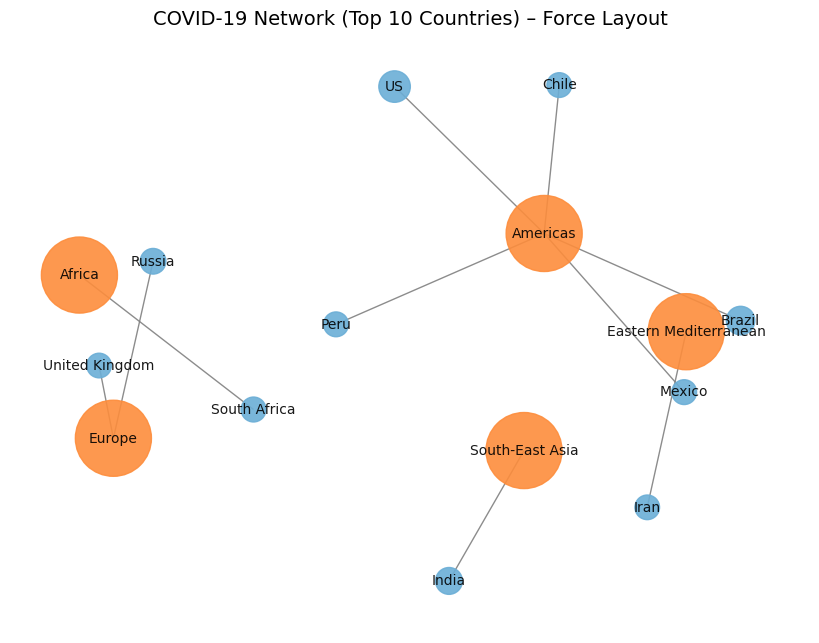

In [ ]:
# TASK 6 – Clean COVID-19 Force Layout Graph (Top 10 or 5 Countries)
from google.colab import files
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Step 0: Upload CSV
uploaded = files.upload()   # Choose country_wise_latest.csv

# Step 1: Load dataset
df = pd.read_csv("country_wise_latest.csv")

# 👉 Choose how many top countries you want
TOP_N = 10      # 🔹 Change to 5 for an even smaller graph

# Select top N countries by confirmed cases
top_countries = df.nlargest(TOP_N, 'Confirmed')

# Step 2: Create Graph
G = nx.Graph()

# Add WHO Region nodes
regions = top_countries['WHO Region'].unique()
G.add_nodes_from(regions, type='region')

# Add country nodes + edges
for _, row in top_countries.iterrows():
    country   = row['Country/Region']
    region    = row['WHO Region']
    confirmed = row['Confirmed']

    G.add_node(country, type='country', confirmed=confirmed)
    G.add_edge(country, region)

# Step 3: Force-based layout
pos = nx.spring_layout(G, k=1.0, iterations=50, seed=42)

# Step 4: Node sizes & colors
node_sizes = []
node_colors = []
for node in G.nodes():
    if G.nodes[node]['type'] == 'country':
        node_sizes.append(G.nodes[node]['confirmed'] / 20000 + 300)  # scale for visibility
        node_colors.append('#6baed6')   # blue for countries
    else:
        node_sizes.append(3000)         # larger region hubs
        node_colors.append('#fd8d3c')   # orange for regions

# Step 5: Draw the network
plt.figure(figsize=(8,6))
nx.draw(
    G, pos,
    with_labels=True,
    node_size=node_sizes,
    node_color=node_colors,
    font_size=10,
    edge_color='gray',
    alpha=0.9
)

plt.title(f"COVID-19 Network (Top {TOP_N} Countries) – Force Layout", fontsize=14)
plt.show()
